In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Otros objetivos
# -----------------------------------------------------------------------
import math

# Gráficos
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

import os
import sys 
sys.path.append(os.path.abspath("../../src"))   
import Soporte_preprocesamiento as f
import warnings
warnings.filterwarnings("ignore")




# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor



from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler, RobustScaler


from tqdm import tqdm


# import plotly_express as px


# Métodos estadísticos
# -----------------------------------------------------------------------
from scipy.stats import zscore # para calcular el z-score
from sklearn.neighbors import LocalOutlierFactor # para detectar outliers usando el método LOF
from sklearn.ensemble import IsolationForest # para detectar outliers usando el metodo IF
from sklearn.neighbors import NearestNeighbors # para calcular la epsilon

# Para generar combinaciones de listas
# -----------------------------------------------------------------------
from itertools import product, combinations
pd.set_option("display.max_columns", None)


In [2]:

df_rob=pd.read_pickle("../../datos/datos2/datos_sinnull_encoded_balanced_scaled.pkl").reset_index(drop=True)

In [3]:
df_rob.head(2)

Age  Attrition  BusinessTravel  Department  EducationField  \
0  1.153846        0.0        0.000000        -1.0             0.0   
1 -0.384615        1.0        0.113333         0.0             0.0   

   MaritalStatus  MonthlyIncome  NumCompaniesWorked  PercentSalaryHike  \
0            0.0       1.498997                 0.0               -0.5   
1            1.0      -0.129721                -1.0                1.5   

   TotalWorkingYears  YearsAtCompany  YearsSinceLastPromotion  \
0           5.663028       -0.666667                -0.333333   
1           0.636505        0.000000                 0.000000   

   EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance  Gender_Female  \
0                      0.0        -0.998673         1.000000            1.0   
1                      0.0         0.001327         1.369994            1.0   

   Gender_Male  DistanceFromHome_entre 1 y 4  DistanceFromHome_entre 13 y 18  \
0         -1.0                           0.0                             0.0   
1         -1.0                           0.0                             0.0   

   DistanceFromHome_entre 19 y 23  DistanceFromHome_entre 24 y 29  \
0                             0.0                             0.0   
1                             0.0                             0.0   

   DistanceFromHome_entre 5 y 8  DistanceFromHome_entre 9 y 12  \
0                           1.0                            0.0   
1                           0.0                            1.0   

   Education_Bachelor  Education_Below College  Education_College  \
0                 0.0                      0.0                1.0   
1                 0.0                      1.0                0.0   

   Education_Doctor  Education_Master  JobLevel_Head  JobLevel_Intern  \
0               0.0               0.0            0.0              1.0   
1               0.0               0.0            0.0              1.0   

   JobLevel_Junior  JobLevel_Manager  JobLevel_Senior  StockOptionLevel_Bad  \
0              0.0               0.0              0.0                   1.0   
1              0.0               0.0              0.0                   0.0   

   StockOptionLevel_Best  StockOptionLevel_Better  StockOptionLevel_Good  \
0                    0.0                      0.0                    0.0   
1                    0.0                      0.0                    1.0   

   JobRole_Healthcare Representative  JobRole_Human Resources  \
0                                1.0                      0.0   
1                                0.0                      0.0   

   JobRole_Laboratory Technician  JobRole_Manager  \
0                            0.0              0.0   
1                            0.0              0.0   

   JobRole_Manufacturing Director  JobRole_Research Director  \
0                             0.0                        0.0   
1                             0.0                        0.0   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                         0.0                      0.0   
1                         1.0                      0.0   

   JobRole_Sales Representative  TrainingTimesLastYear_0.0  \
0                           0.0                        0.0   
1                           0.0                        0.0   

   TrainingTimesLastYear_1.0  TrainingTimesLastYear_2.0  \
0                        0.0                        0.0   
1                        0.0                        0.0   

   TrainingTimesLastYear_3.0  TrainingTimesLastYear_4.0  \
0                        0.0                        0.0   
1                        1.0                        0.0   

   TrainingTimesLastYear_5.0  TrainingTimesLastYear_6.0  JobInvolvement_High  \
0                        0.0                        1.0                  0.0   
1                        0.0                        0.0                 -1.0   

   JobInvolvement_Low  JobInvolvement_Medium  JobInvolvement_Very High  
0               

Primero identificamos los outliers en univariados

In [4]:
all_columns =df_rob.columns   

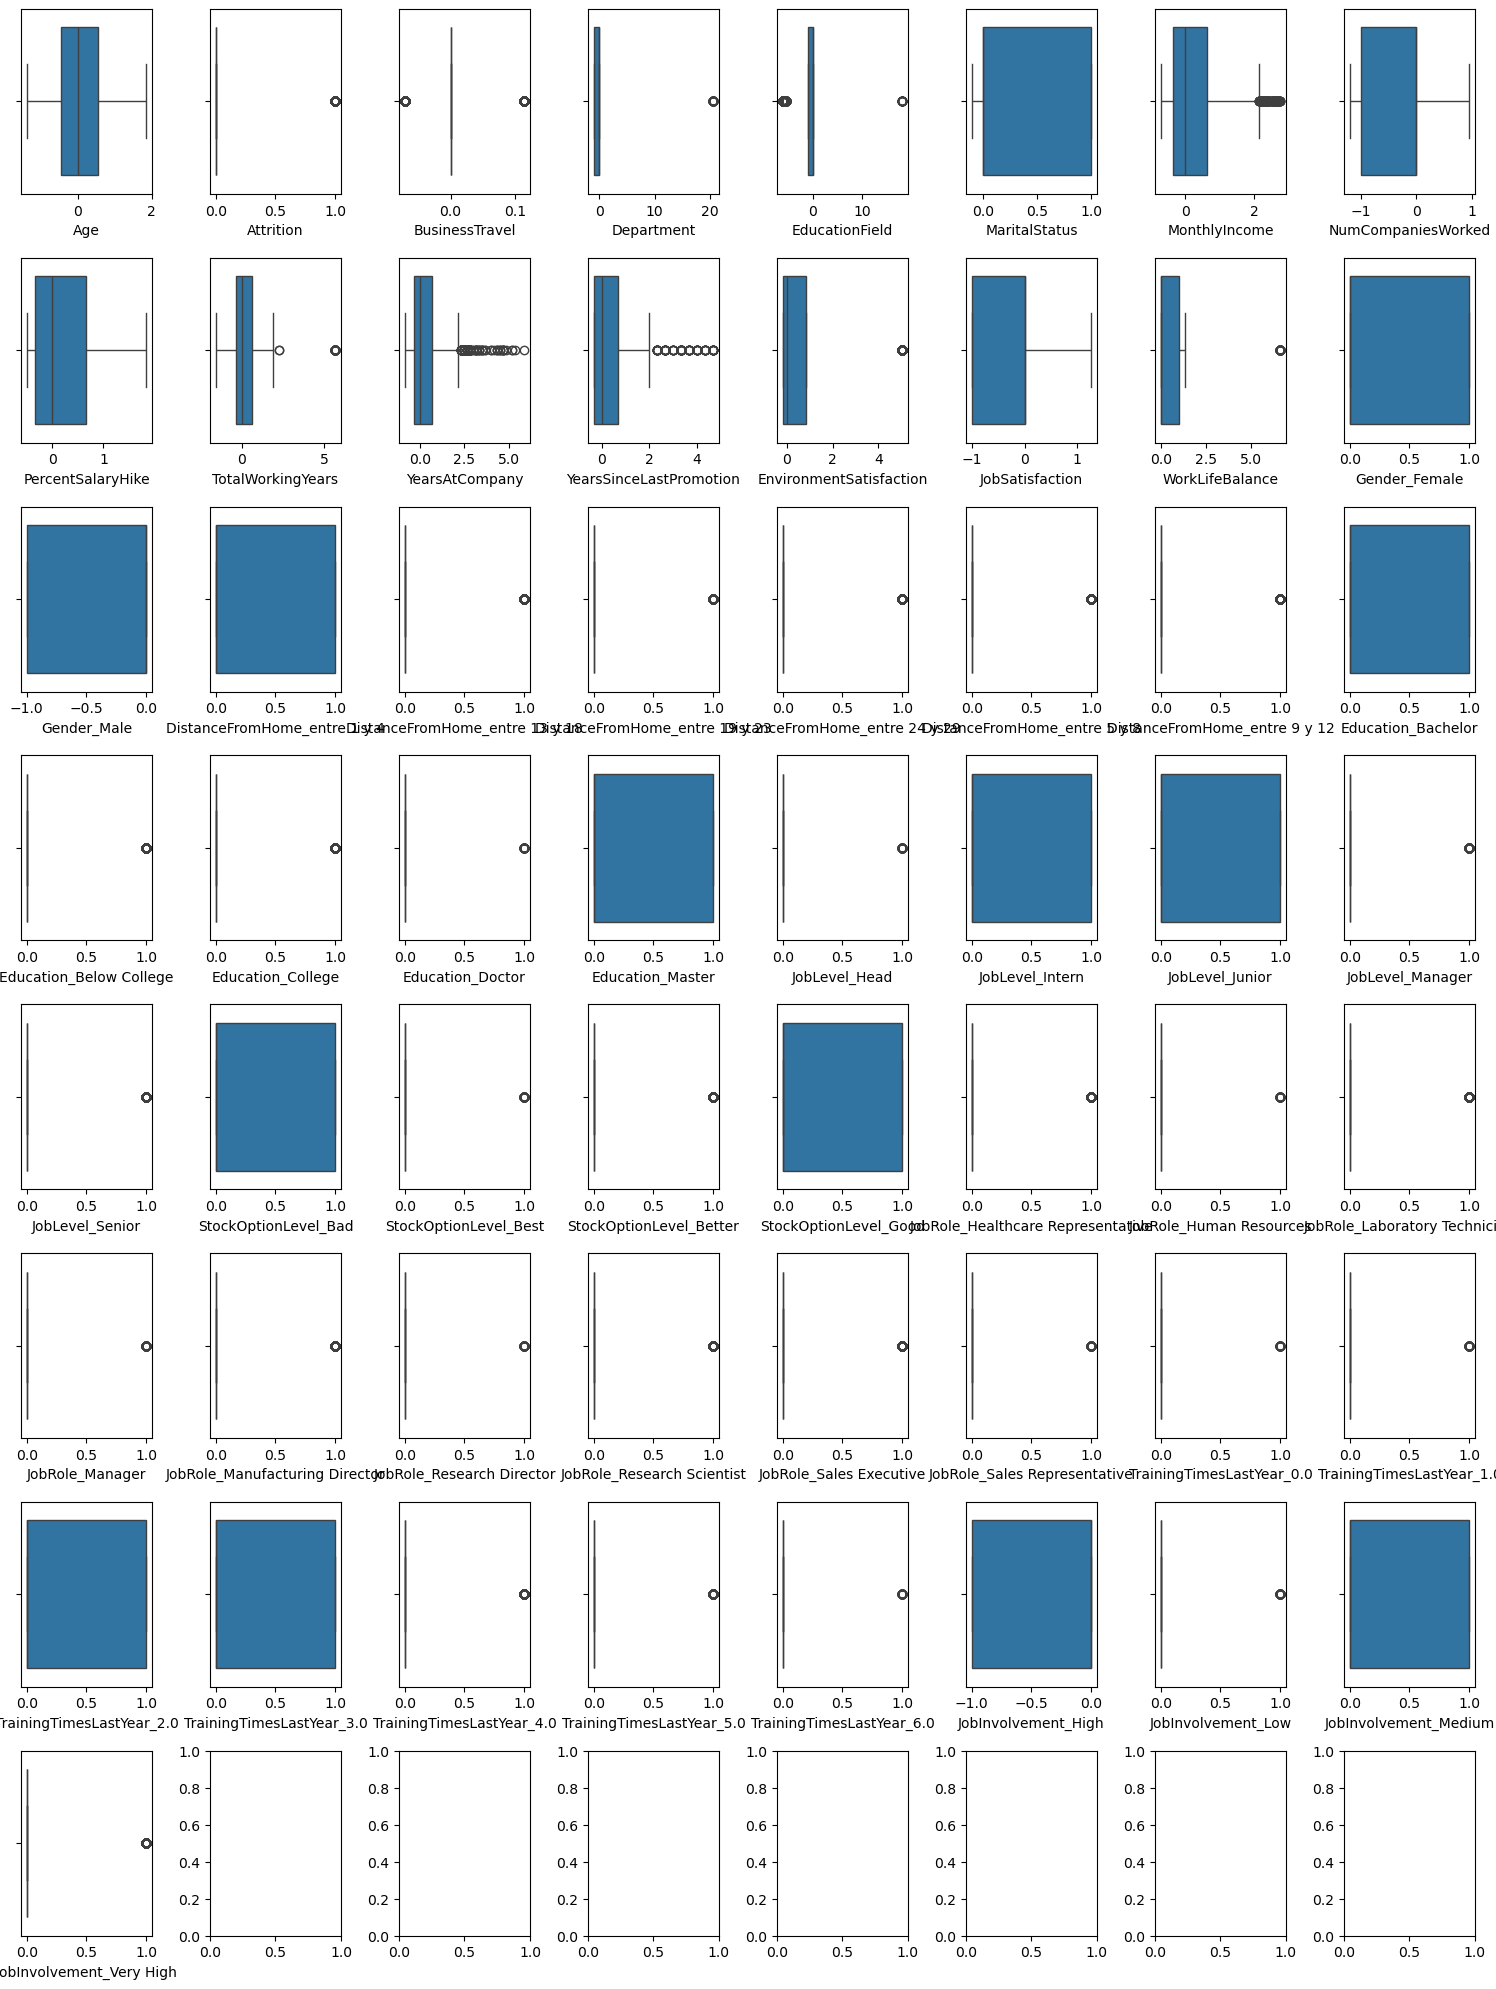

In [5]:
f.visualizar_outliers_box(df_rob, all_columns)

En esta gráfica recordamos las distribuciones (Tanto de categóricas como de numéricas) y en el caso de las numéricas muestro sus outliers univariados.

Dado que no tienen todas una distribución normal, no utilizaré el Z-Score ya que el porcentaje de fallo será demasiado alto. Por ello opto por el IQR

In [6]:
dicc_iqr=f.identificar_outliers_iqr(df_rob)

La columna AGE tiene 0 outliers
La columna ATTRITION tiene 252 outliers
La columna BUSINESSTRAVEL tiene 456 outliers
La columna DEPARTMENT tiene 66 outliers
La columna EDUCATIONFIELD tiene 262 outliers
La columna MARITALSTATUS tiene 0 outliers
La columna MONTHLYINCOME tiene 122 outliers
La columna NUMCOMPANIESWORKED tiene 0 outliers
La columna PERCENTSALARYHIKE tiene 0 outliers
La columna TOTALWORKINGYEARS tiene 86 outliers
La columna YEARSATCOMPANY tiene 110 outliers
La columna YEARSSINCELASTPROMOTION tiene 112 outliers
La columna ENVIRONMENTSATISFACTION tiene 300 outliers
La columna JOBSATISFACTION tiene 0 outliers
La columna WORKLIFEBALANCE tiene 83 outliers
La columna GENDER_FEMALE tiene 0 outliers
La columna GENDER_MALE tiene 0 outliers
La columna DISTANCEFROMHOME_ENTRE 1 Y 4 tiene 0 outliers
La columna DISTANCEFROMHOME_ENTRE 13 Y 18 tiene 151 outliers
La columna DISTANCEFROMHOME_ENTRE 19 Y 23 tiene 121 outliers
La columna DISTANCEFROMHOME_ENTRE 24 Y 29 tiene 150 outliers
La colum

In [7]:
dicc_iqr["Attrition"].head(2)

Age  Attrition  BusinessTravel  Department  EducationField  \
1 -0.384615        1.0        0.113333         0.0        0.000000   
6 -0.615385        1.0        0.000000         0.0        0.076206   

   MaritalStatus  MonthlyIncome  NumCompaniesWorked  PercentSalaryHike  \
1            1.0      -0.129721           -1.000000                1.5   
6            1.0       0.166575           -1.146654                1.0   

   TotalWorkingYears  YearsAtCompany  YearsSinceLastPromotion  \
1           0.636505        0.000000                 0.000000   
6           0.528539       -0.833333                -0.333333   

   EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance  Gender_Female  \
1                 0.000000         0.001327         1.369994            1.0   
6                 5.040761         0.000000         6.638161            0.0   

   Gender_Male  DistanceFromHome_entre 1 y 4  DistanceFromHome_entre 13 y 18  \
1         -1.0                           0.0                             0.0   
6          0.0                           0.0                             0.0   

   DistanceFromHome_entre 19 y 23  DistanceFromHome_entre 24 y 29  \
1                             0.0                             0.0   
6                             0.0                             0.0   

   DistanceFromHome_entre 5 y 8  DistanceFromHome_entre 9 y 12  \
1                           0.0                            1.0   
6                           0.0                            1.0   

   Education_Bachelor  Education_Below College  Education_College  \
1                 0.0                      1.0                0.0   
6                 0.0                      0.0                1.0   

   Education_Doctor  Education_Master  JobLevel_Head  JobLevel_Intern  \
1               0.0               0.0            0.0              1.0   
6               0.0               0.0            0.0              0.0   

   JobLevel_Junior  JobLevel_Manager  JobLevel_Senior  StockOptionLevel_Bad  \
1              0.0               0.0              0.0                   0.0   
6              1.0               0.0              0.0                   0.0   

   StockOptionLevel_Best  StockOptionLevel_Better  StockOptionLevel_Good  \
1                    0.0                      0.0                    1.0   
6                    0.0                      0.0                    1.0   

   JobRole_Healthcare Representative  JobRole_Human Resources  \
1                                0.0                      0.0   
6                                0.0                      0.0   

   JobRole_Laboratory Technician  JobRole_Manager  \
1                            0.0              0.0   
6                            0.0              0.0   

   JobRole_Manufacturing Director  JobRole_Research Director  \
1                             0.0                        0.0   
6                             0.0                        0.0   

   JobRole_Research Scientist  JobRole_Sales Executive  \
1                         1.0                      0.0   
6                         0.0                      1.0   

   JobRole_Sales Representative  TrainingTimesLastYear_0.0  \
1                           0.0                        0.0   
6                           0.0                        0.0   

   TrainingTimesLastYear_1.0  TrainingTimesLastYear_2.0  \
1                        0.0                        0.0   
6                        0.0                        1.0   

   TrainingTimesLastYear_3.0  TrainingTimesLastYear_4.0  \
1                        1.0                        0.0   
6                        0.0                        0.0   

   TrainingTimesLastYear_5.0  TrainingTimesLastYear_6.0  JobInvolvement_High  \
1                        0.0                        0.0                 -1.0   
6                        0.0                        0.0                  0.0   

   JobInvolvement_Low  JobInvolvement_Medium  JobInvolvement_Very High  
1               

In [8]:
dicc_iqr["MonthlyIncome"].head(2)

Age  Attrition  BusinessTravel  Department  EducationField  \
2  -0.307692        0.0        0.113333         0.0       -5.396957   
55 -0.230769        0.0        0.113333         0.0        0.000000   

    MaritalStatus  MonthlyIncome  NumCompaniesWorked  PercentSalaryHike  \
2             0.0       2.632366            0.000000           0.166667   
55            0.0       2.644043            0.715979          -0.333333   

    TotalWorkingYears  YearsAtCompany  YearsSinceLastPromotion  \
2            0.528539        0.000000                -0.333333   
55          -0.388358        0.833333                 2.333333   

    EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance  Gender_Female  \
2                  0.826826         0.001327         6.638161            0.0   
55                -0.173174         0.001327         0.000000            0.0   

    Gender_Male  DistanceFromHome_entre 1 y 4  DistanceFromHome_entre 13 y 18  \
2           0.0                           0.0                             1.0   
55          0.0                           0.0                             0.0   

    DistanceFromHome_entre 19 y 23  DistanceFromHome_entre 24 y 29  \
2                              0.0                             0.0   
55                             0.0                             0.0   

    DistanceFromHome_entre 5 y 8  DistanceFromHome_entre 9 y 12  \
2                            0.0                            0.0   
55                           0.0                            1.0   

    Education_Bachelor  Education_Below College  Education_College  \
2                  0.0                      0.0                0.0   
55                 1.0                      0.0                0.0   

    Education_Doctor  Education_Master  JobLevel_Head  JobLevel_Intern  \
2                0.0               1.0            0.0              0.0   
55               0.0               0.0            0.0              0.0   

    JobLevel_Junior  JobLevel_Manager  JobLevel_Senior  StockOptionLevel_Bad  \
2               0.0               1.0              0.0                   0.0   
55              0.0               1.0              0.0                   0.0   

    StockOptionLevel_Best  StockOptionLevel_Better  StockOptionLevel_Good  \
2                     1.0                      0.0                    0.0   
55                    0.0                      0.0                    1.0   

    JobRole_Healthcare Representative  JobRole_Human Resources  \
2                                 0.0                      0.0   
55                                0.0                      0.0   

    JobRole_Laboratory Technician  JobRole_Manager  \
2                             0.0              0.0   
55                            0.0              0.0   

    JobRole_Manufacturing Director  JobRole_Research Director  \
2                              0.0                        0.0   
55                             0.0                        1.0   

    JobRole_Research Scientist  JobRole_Sales Executive  \
2                          0.0                      1.0   
55                         0.0                      0.0   

    JobRole_Sales Representative  TrainingTimesLastYear_0.0  \
2                            0.0                        0.0   
55                           0.0                        0.0   

    TrainingTimesLastYear_1.0  TrainingTimesLastYear_2.0  \
2                         0.0                        1.0   
55                        0.0                        0.0   

    TrainingTimesLastYear_3.0  TrainingTimesLastYear_4.0  \
2                         0.0                        0.0   
55                        1.0                        0.0   

    TrainingTimesLastYear_5.0  TrainingTimesLastYear_6.0  JobInvolvement_High  \
2                         0.0                        0.0                  0.0   
55                        0.0                        0.0                  0.0   

    JobInvolvement_Low  JobInvolv

In [9]:
dicc_iqr["YearsAtCompany"].head(2)

Age  Attrition  BusinessTravel  Department  EducationField  \
10  0.692308        0.0             0.0         0.0        0.076206   
12  1.461538        0.0             0.0         0.0        0.000000   

    MaritalStatus  MonthlyIncome  NumCompaniesWorked  PercentSalaryHike  \
10            0.0       0.563948                -1.0          -0.166667   
12            1.0       0.116402                -1.0           0.500000   

    TotalWorkingYears  YearsAtCompany  YearsSinceLastPromotion  \
10          -1.570183        2.500000                      1.0   
12          -0.161299        5.166667                      1.0   

    EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance  Gender_Female  \
10                 0.000000        -0.998673              0.0            0.0   
12                -0.173174         1.259104              0.0            1.0   

    Gender_Male  DistanceFromHome_entre 1 y 4  DistanceFromHome_entre 13 y 18  \
10          0.0                           0.0                             1.0   
12         -1.0                           0.0                             1.0   

    DistanceFromHome_entre 19 y 23  DistanceFromHome_entre 24 y 29  \
10                             0.0                             0.0   
12                             0.0                             0.0   

    DistanceFromHome_entre 5 y 8  DistanceFromHome_entre 9 y 12  \
10                           0.0                            0.0   
12                           0.0                            0.0   

    Education_Bachelor  Education_Below College  Education_College  \
10                 0.0                      0.0                1.0   
12                 0.0                      0.0                0.0   

    Education_Doctor  Education_Master  JobLevel_Head  JobLevel_Intern  \
10               0.0               0.0            0.0              0.0   
12               0.0               1.0            0.0              1.0   

    JobLevel_Junior  JobLevel_Manager  JobLevel_Senior  StockOptionLevel_Bad  \
10              1.0               0.0              0.0                   0.0   
12              0.0               0.0              0.0                   1.0   

    StockOptionLevel_Best  StockOptionLevel_Better  StockOptionLevel_Good  \
10                    0.0                      1.0                    0.0   
12                    0.0                      0.0                    0.0   

    JobRole_Healthcare Representative  JobRole_Human Resources  \
10                                0.0                      0.0   
12                                0.0                      0.0   

    JobRole_Laboratory Technician  JobRole_Manager  \
10                            1.0              0.0   
12                            0.0              0.0   

    JobRole_Manufacturing Director  JobRole_Research Director  \
10                             0.0                        0.0   
12                             0.0                        0.0   

    JobRole_Research Scientist  JobRole_Sales Executive  \
10                         0.0                      0.0   
12                         0.0                      1.0   

    JobRole_Sales Representative  TrainingTimesLastYear_0.0  \
10                           0.0                        0.0   
12                           0.0                        0.0   

    TrainingTimesLastYear_1.0  TrainingTimesLastYear_2.0  \
10                        0.0                        1.0   
12                        0.0                        1.0   

    TrainingTimesLastYear_3.0  TrainingTimesLastYear_4.0  \
10                        0.0                        0.0   
12                        0.0                        0.0   

    TrainingTimesLastYear_5.0  TrainingTimesLastYear_6.0  JobInvolvement_High  \
10                        0.0                        0.0                 -1.0   
12                        0.0                        0.0                  0.0   

    JobInvolvement_Low  JobInvolv

In [10]:
dicc_iqr["YearsSinceLastPromotion"].head(2)

Age  Attrition  BusinessTravel  Department  EducationField  \
11  0.000000        0.0        0.000000         0.0        0.000000   
13  0.846154        1.0       -0.070455         0.0        0.076206   

    MaritalStatus  MonthlyIncome  NumCompaniesWorked  PercentSalaryHike  \
11            0.0      -0.277869                -1.0          -0.333333   
13            0.0       0.157271                 0.0          -0.500000   

    TotalWorkingYears  YearsAtCompany  YearsSinceLastPromotion  \
11          -0.993642        1.666667                 3.000000   
13          -0.316484        0.833333                 2.666667   

    EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance  Gender_Female  \
11                 0.000000        -0.998673              0.0            0.0   
13                 5.040761         0.001327              1.0            0.0   

    Gender_Male  DistanceFromHome_entre 1 y 4  DistanceFromHome_entre 13 y 18  \
11          0.0                           0.0                             0.0   
13          0.0                           1.0                             0.0   

    DistanceFromHome_entre 19 y 23  DistanceFromHome_entre 24 y 29  \
11                             0.0                             1.0   
13                             0.0                             0.0   

    DistanceFromHome_entre 5 y 8  DistanceFromHome_entre 9 y 12  \
11                           0.0                            0.0   
13                           0.0                            0.0   

    Education_Bachelor  Education_Below College  Education_College  \
11                 0.0                      1.0                0.0   
13                 0.0                      1.0                0.0   

    Education_Doctor  Education_Master  JobLevel_Head  JobLevel_Intern  \
11               0.0               0.0            0.0              1.0   
13               0.0               0.0            0.0              1.0   

    JobLevel_Junior  JobLevel_Manager  JobLevel_Senior  StockOptionLevel_Bad  \
11              0.0               0.0              0.0                   0.0   
13              0.0               0.0              0.0                   0.0   

    StockOptionLevel_Best  StockOptionLevel_Better  StockOptionLevel_Good  \
11                    0.0                      1.0                    0.0   
13                    0.0                      1.0                    0.0   

    JobRole_Healthcare Representative  JobRole_Human Resources  \
11                                0.0                      0.0   
13                                0.0                      0.0   

    JobRole_Laboratory Technician  JobRole_Manager  \
11                            1.0              0.0   
13                            0.0              0.0   

    JobRole_Manufacturing Director  JobRole_Research Director  \
11                             0.0                        0.0   
13                             0.0                        0.0   

    JobRole_Research Scientist  JobRole_Sales Executive  \
11                         0.0                      0.0   
13                         1.0                      0.0   

    JobRole_Sales Representative  TrainingTimesLastYear_0.0  \
11                           0.0                        0.0   
13                           0.0                        0.0   

    TrainingTimesLastYear_1.0  TrainingTimesLastYear_2.0  \
11                        0.0                        1.0   
13                        0.0                        0.0   

    TrainingTimesLastYear_3.0  TrainingTimesLastYear_4.0  \
11                        0.0                        0.0   
13                        0.0                        1.0   

    TrainingTimesLastYear_5.0  TrainingTimesLastYear_6.0  JobInvolvement_High  \
11                        0.0                        0.0                  0.0   
13                        0.0                        0.0                 -1.0   

    JobInvolvement_Low  JobInvolv

In [11]:
dicc_iqr["TotalWorkingYears"].head(2)

Age  Attrition  BusinessTravel  Department  EducationField  \
0    1.153846        0.0             0.0   -1.000000        0.000000   
105 -0.230769        1.0             0.0   20.522155       18.129089   

     MaritalStatus  MonthlyIncome  NumCompaniesWorked  PercentSalaryHike  \
0              0.0       1.498997                 0.0          -0.500000   
105            1.0       0.120598                 0.0           1.166667   

     TotalWorkingYears  YearsAtCompany  YearsSinceLastPromotion  \
0             5.663028       -0.666667                -0.333333   
105           5.663028       -0.666667                -0.333333   

     EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance  Gender_Female  \
0                   0.000000        -0.998673              1.0            1.0   
105                -0.173174         0.000000              0.0            1.0   

     Gender_Male  DistanceFromHome_entre 1 y 4  \
0           -1.0                           0.0   
105         -1.0                           0.0   

     DistanceFromHome_entre 13 y 18  DistanceFromHome_entre 19 y 23  \
0                               0.0                             0.0   
105                             0.0                             0.0   

     DistanceFromHome_entre 24 y 29  DistanceFromHome_entre 5 y 8  \
0                               0.0                           1.0   
105                             1.0                           0.0   

     DistanceFromHome_entre 9 y 12  Education_Bachelor  \
0                              0.0                 0.0   
105                            0.0                 0.0   

     Education_Below College  Education_College  Education_Doctor  \
0                        0.0                1.0               0.0   
105                      0.0                1.0               0.0   

     Education_Master  JobLevel_Head  JobLevel_Intern  JobLevel_Junior  \
0                 0.0            0.0              1.0              0.0   
105               0.0            1.0              0.0              0.0   

     JobLevel_Manager  JobLevel_Senior  StockOptionLevel_Bad  \
0                 0.0              0.0                   1.0   
105               0.0              0.0                   0.0   

     StockOptionLevel_Best  StockOptionLevel_Better  StockOptionLevel_Good  \
0                      0.0                      0.0                    0.0   
105                    0.0                      0.0                    1.0   

     JobRole_Healthcare Representative  JobRole_Human Resources  \
0                                  1.0                      0.0   
105                                0.0                      0.0   

     JobRole_Laboratory Technician  JobRole_Manager  \
0                              0.0              0.0   
105                            0.0              1.0   

     JobRole_Manufacturing Director  JobRole_Research Director  \
0                               0.0                        0.0   
105                             0.0                        0.0   

     JobRole_Research Scientist  JobRole_Sales Executive  \
0                           0.0                      0.0   
105                         0.0                      0.0   

     JobRole_Sales Representative  TrainingTimesLastYear_0.0  \
0                             0.0                        0.0   
105                           0.0                        0.0   

     TrainingTimesLastYear_1.0  TrainingTimesLastYear_2.0  \
0                          0.0                        0.0   
105                        0.0                        0.0   

     TrainingTimesLastYear_3.0  TrainingTimesLastYear_4.0  \
0                          0.0                        0.0   
105                        1.0                        0.0   

     TrainingTimesLastYear_5.0  TrainingTimesLastYear_6.0  \
0                          0.0                        1.0   
105                        0.0                        0.0   

     JobInvolvemen

Observamos como el número de outliers por lo general es alto (un poco menos del 10% de las filas) y parecen estar muy juntos entre ellos en MonthlyIncome, mientras que en el resto si que están más separados. Esto me lleva a pensar que un LOF podría ser la mejor opción. Sin embargo, vamos a comprobarlo. 

In [12]:
# contaminacion= [0.01, 0.05, 0.1]
# estimadores = [100,400,1000, 2000] 
# combinaciones= list(product(contaminacion, estimadores))
# for cont, esti in combinaciones:
    
#     ifo=IsolationForest(random_state=42, n_estimators=esti, contamination= cont, n_jobs=-1)         #n_estimator es el número de árboles y n_jobs con -1 coge todos los nucleos del ordenador

#     df_rob[f"outliers_ifo_{cont}_{esti}"]=ifo.fit_predict(df_rob[["price","size_MinMax","distance_MinMax"]]) 

In [13]:
# df_rob["outliers_ifo_0.01_100"].value_counts(normalize=True)    #Esto nos muetsra como se acerca mucho al 1% de outliers por el nivel de contaminación ser 0.01

In [14]:
# df_min.head()

In [15]:
# columnas_hue=df_min.filter(like="outliers")

In [16]:
# combinaciones_visual=list(combinations(["price","size_MinMax","distance_MinMax"], 2))

# for out in columnas_hue:


#     fig, axes = plt.subplots(nrows=1,ncols=3, figsize=(15,5))
#     axes=axes.flat
#     for indice, tupla in enumerate(combinaciones_visual):
#         sns.scatterplot(x=tupla[0], y=tupla[1], ax= axes[indice], data=df_min, hue= out, palette= "Set1", alpha= 0.2, style= out)

<!-- Observamos como a mayor número de arboles los outliers se van agrupando más.  
Además según vamos siendo más estrictos con el nivel de contaminación, más sentido tiene la interpretación. 
Podemos observar como el IFO nos muestrá que por lo general los precios bajos son considerados outliers. -->

In [17]:
# df_min.head()

<!-- 
A pesar de que teóricamente el IFO por las carcaterísticas de los datos parece ser la mejor opción y tras haber observado que marca outliers en los precios ma´s bajo. Pasamos ahora a identificar los outliers con la metodología LOF.

Para poder comparar más fácil voy a sacar IFO y LOF juntos. -->

100%|██████████| 12/12 [00:05<00:00,  2.29it/s]


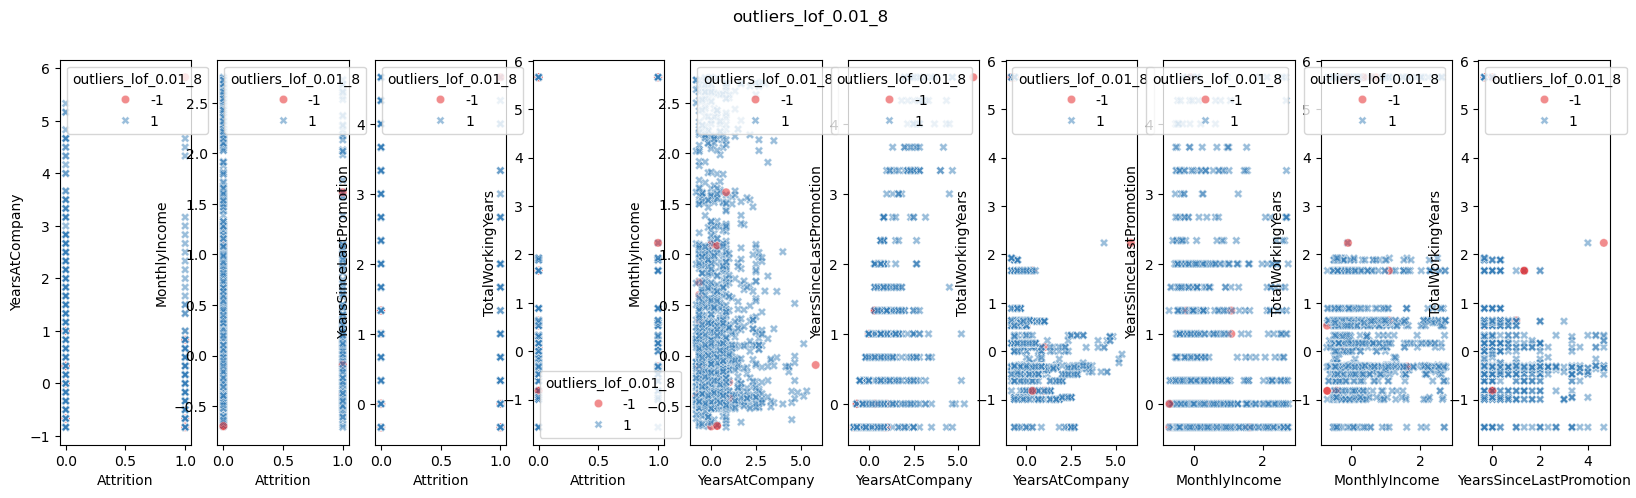

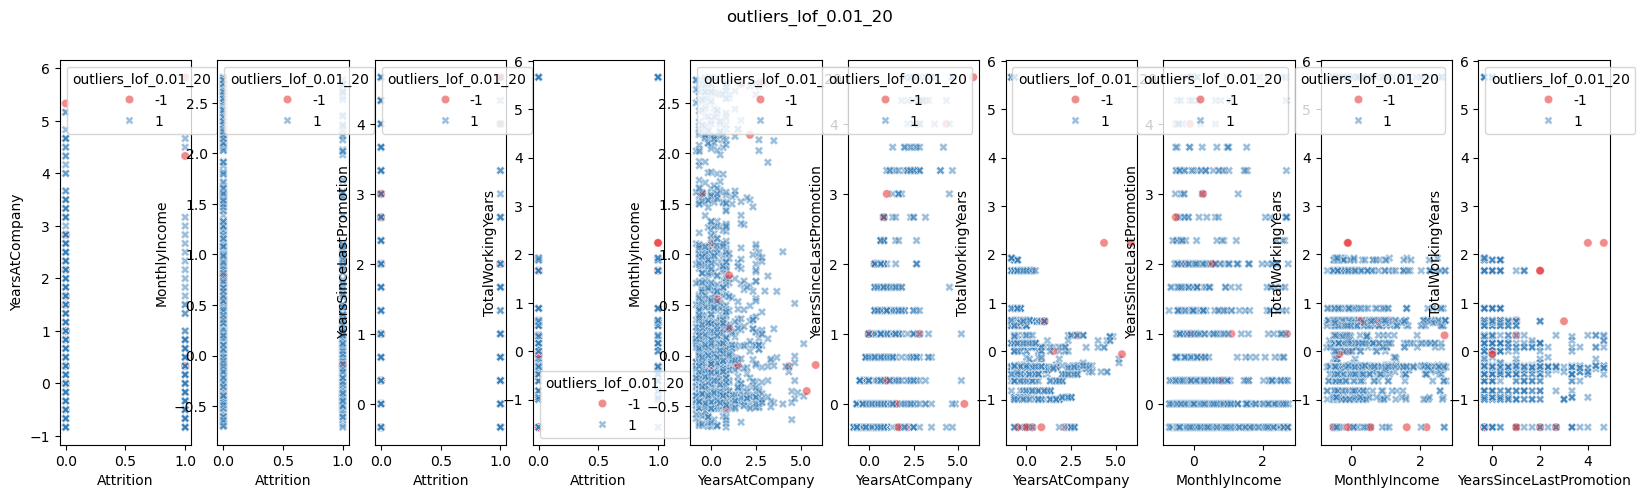

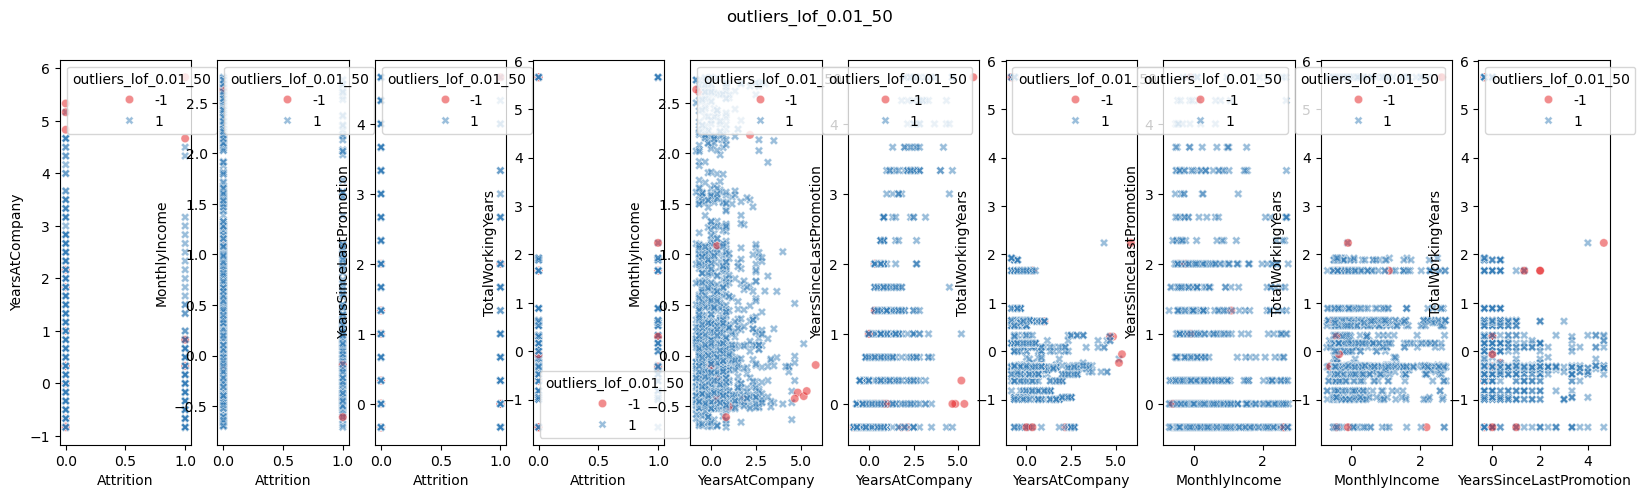

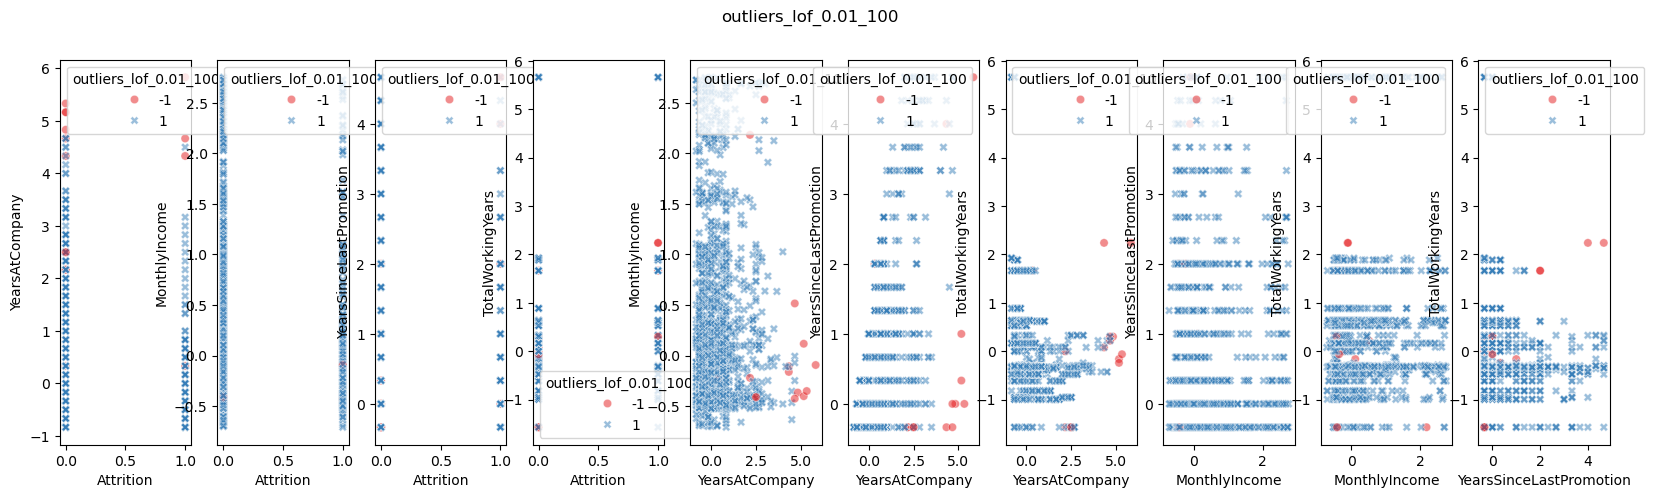

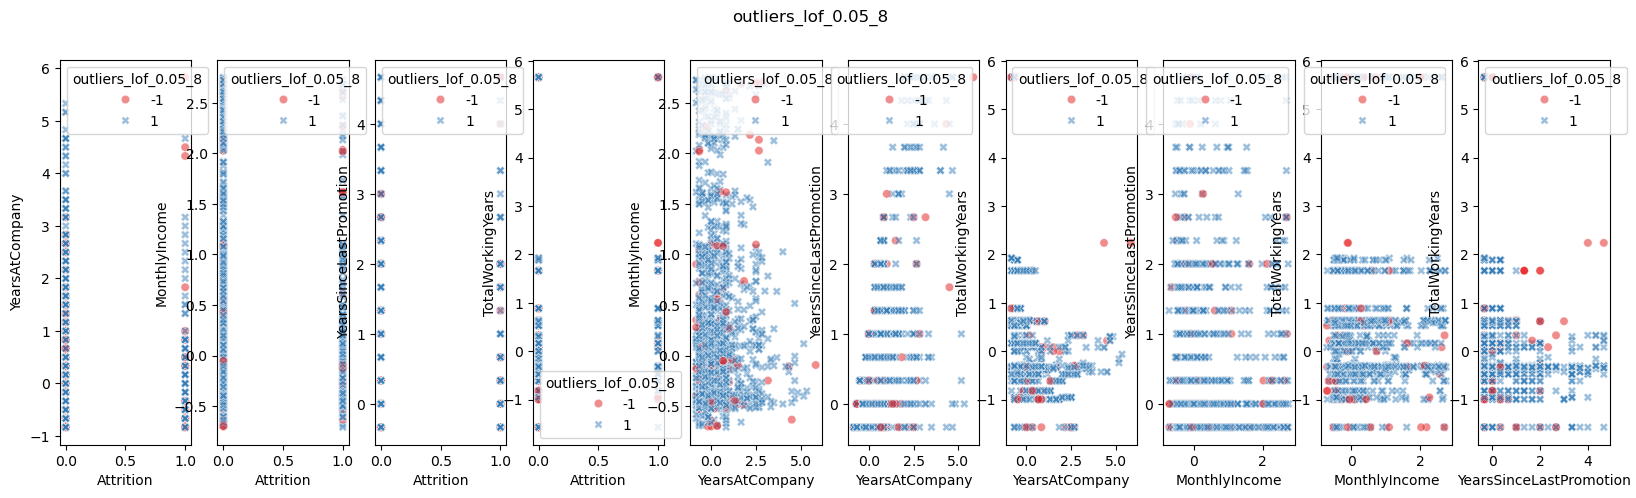

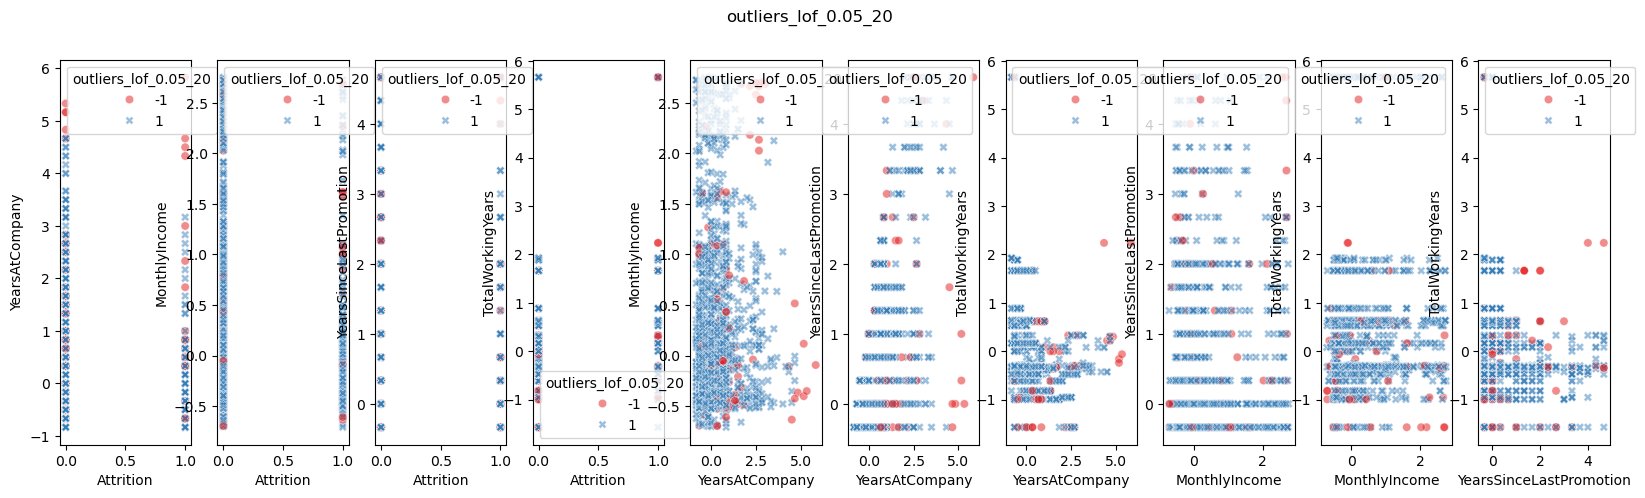

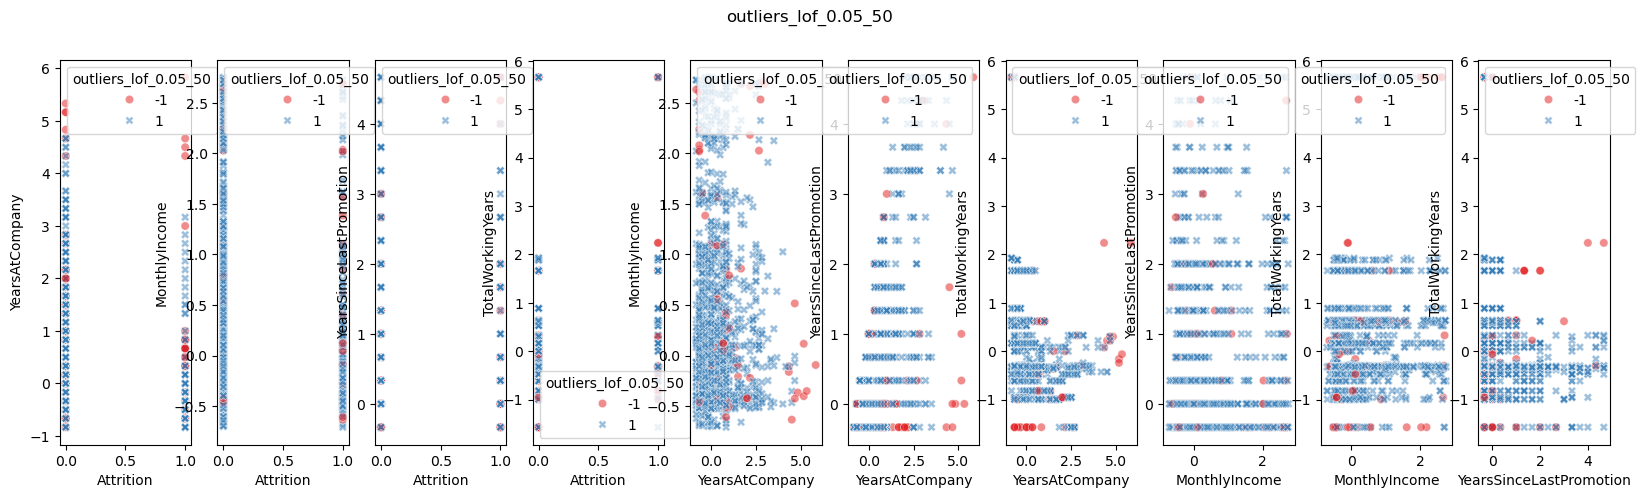

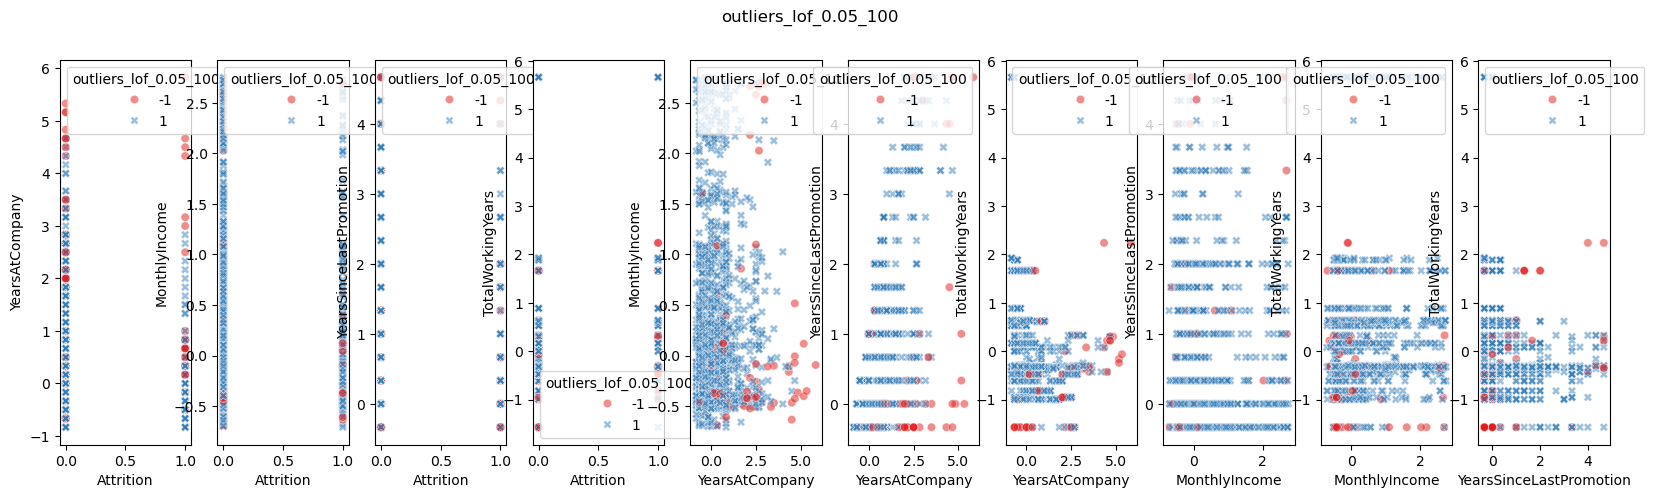

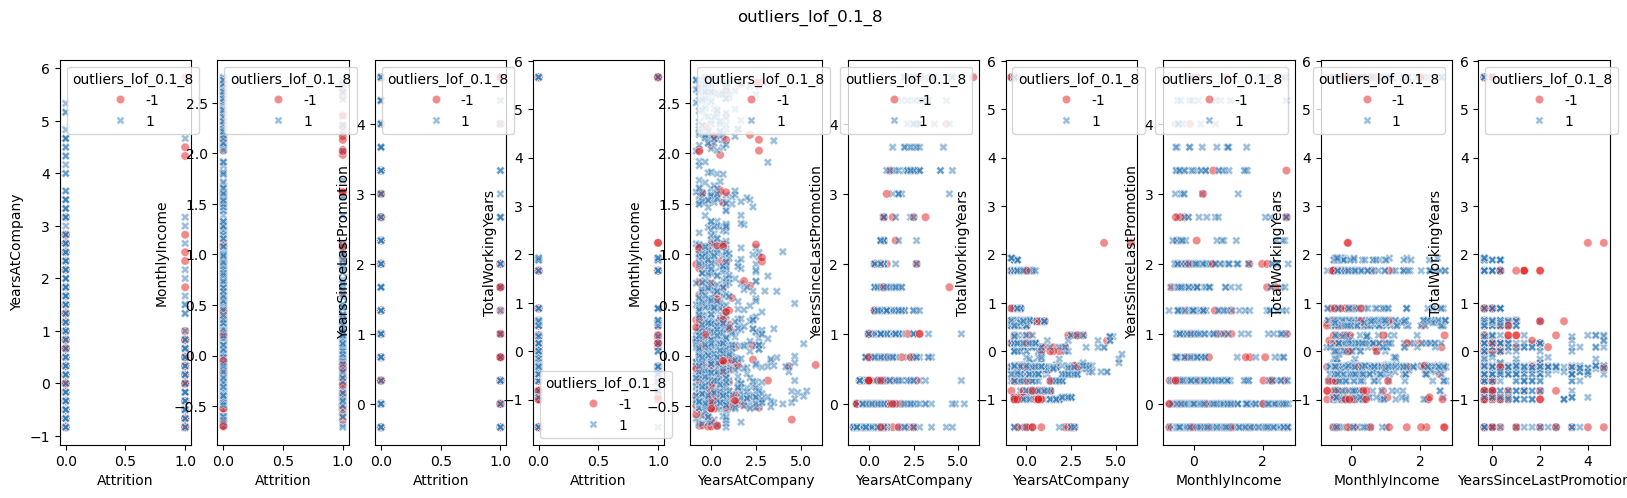

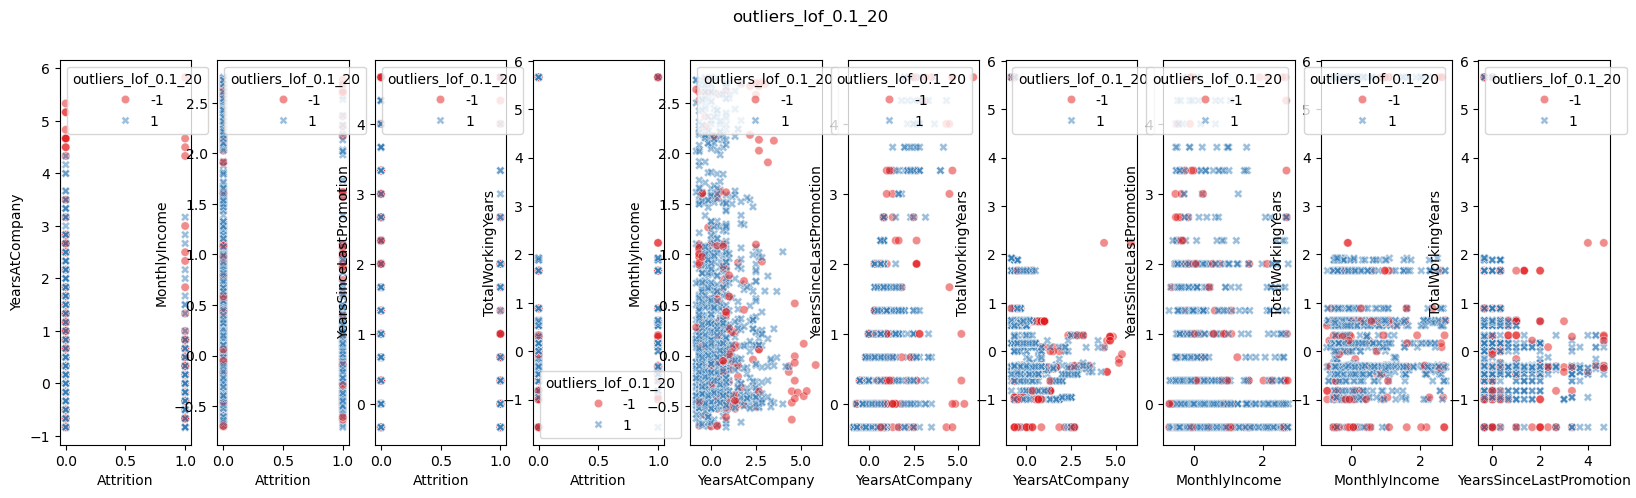

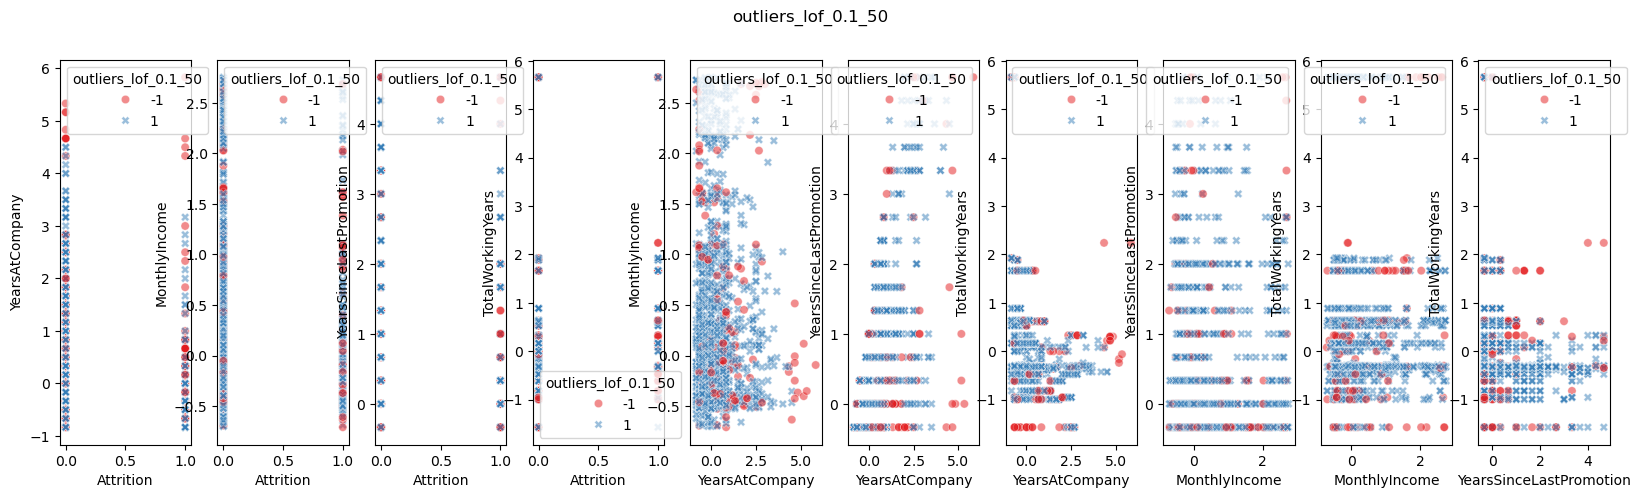

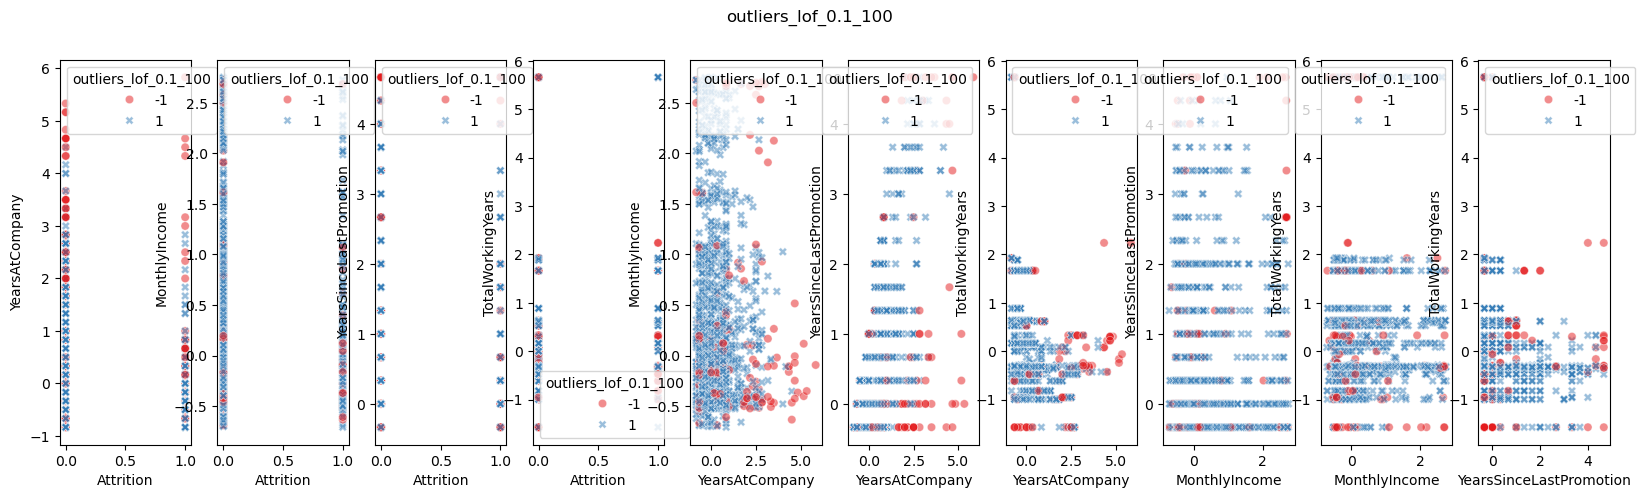

In [18]:
lista_contaminaciones = [0.01, 0.05, 0.1]
lista_neighbors = [8,20,50,100]

combinaciones = list(product(lista_contaminaciones, lista_neighbors))
combinaciones


for cont, neighbors in tqdm(combinaciones):
    lof = LocalOutlierFactor(n_neighbors=neighbors,
                            contamination=cont,
                            n_jobs=-1)

    df_rob[f"outliers_lof_{cont}_{neighbors}"] = lof.fit_predict(df_rob[["Attrition","YearsAtCompany","MonthlyIncome", "YearsSinceLastPromotion","TotalWorkingYears"]])
    y_pred = lof.fit_predict(df_rob[["Attrition","YearsAtCompany","MonthlyIncome", "YearsSinceLastPromotion","TotalWorkingYears"]])
df_rob

#visualizacion
columnas_hue = df_rob.filter(like="outlier").columns

combinaciones_viz = list(combinations(["Attrition","YearsAtCompany","MonthlyIncome", "YearsSinceLastPromotion","TotalWorkingYears"], 2))
combinaciones_viz

for outlier in tqdm(columnas_hue):
    fig, axes = plt.subplots(nrows=1, ncols=10, figsize = (20, 5))
    axes = axes.flat

    for indice, tupla in enumerate(combinaciones_viz):
        sns.scatterplot(x = tupla[0],
                        y = tupla[1],
                        ax = axes[indice],
                        data = df_rob,
                        hue=outlier,
                        palette="Set1",
                        style=outlier,
                        alpha=0.5)
        
    plt.suptitle(outlier)

Lo que saco en claro es que el nivel de contaminación más estricto (10%) es la mejor opción porque es el que más se acerca a la realidad de los datos.  

In [19]:
df_rob.head()

Age  Attrition  BusinessTravel  Department  EducationField  \
0  1.153846        0.0        0.000000        -1.0        0.000000   
1 -0.384615        1.0        0.113333         0.0        0.000000   
2 -0.307692        0.0        0.113333         0.0       -5.396957   
3  0.153846        0.0       -0.070455         0.0        0.000000   
4 -0.307692        0.0        0.000000         0.0        0.076206   

   MaritalStatus  MonthlyIncome  NumCompaniesWorked  PercentSalaryHike  \
0            0.0       1.498997            0.000000          -0.500000   
1            1.0      -0.129721           -1.000000           1.500000   
2            0.0       2.632366            0.000000           0.166667   
3            0.0       0.624156           -1.203634          -0.500000   
4            1.0      -0.466703           -0.881345          -0.333333   

   TotalWorkingYears  YearsAtCompany  YearsSinceLastPromotion  \
0           5.663028       -0.666667                -0.333333   
1           0.636505        0.000000                 0.000000   
2           0.528539        0.000000                -0.333333   
3          -0.818760        0.500000                 2.000000   
4          -0.473628        0.166667                -0.333333   

   EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance  Gender_Female  \
0                 0.000000        -0.998673         1.000000            1.0   
1                 0.000000         0.001327         1.369994            1.0   
2                 0.826826         0.001327         6.638161            0.0   
3                -0.173174        -0.998673         0.000000            0.0   
4                -0.173174         1.259104         0.000000            0.0   

   Gender_Male  DistanceFromHome_entre 1 y 4  DistanceFromHome_entre 13 y 18  \
0         -1.0                           0.0                             0.0   
1         -1.0                           0.0                             0.0   
2          0.0                           0.0                             1.0   
3          0.0                           1.0                             0.0   
4          0.0                           0.0                             0.0   

   DistanceFromHome_entre 19 y 23  DistanceFromHome_entre 24 y 29  \
0                             0.0                             0.0   
1                             0.0                             0.0   
2                             0.0                             0.0   
3                             0.0                             0.0   
4                             0.0                             0.0   

   DistanceFromHome_entre 5 y 8  DistanceFromHome_entre 9 y 12  \
0                           1.0                            0.0   
1                           0.0                            1.0   
2                           0.0                            0.0   
3                           0.0                            0.0   
4                           0.0                            1.0   

   Education_Bachelor  Education_Below College  Education_College  \
0                 0.0                      0.0                1.0   
1                 0.0                      1.0                0.0   
2                 0.0                      0.0                0.0   
3                 0.0                      0.0                0.0   
4                 0.0                      1.0                0.0   

   Education_Doctor  Education_Master  JobLevel_Head  JobLevel_Intern  \
0               0.0               0.0            0.0              1.0   
1               0.0               0.0            0.0              1.0   
2               0.0               1.0            0.0              0.0   
3               1.0               0.0            0.0              0.0   
4               0.0               0.0            0.0              1.0   

   JobLevel_Junior  JobLevel_Manager  JobLevel_Senior  StockOptionLevel_Bad  \
0              0.0               0.0              

Ahora me quito las que tengan todas las filas con 1 y así me quedo con todas las que al menos tienen un Outlier

In [20]:
columnasdf=df_rob.filter(like="outliers_lof")
columnas_lof=columnasdf.columns

In [21]:

# filtered_df = df_rob[(df_rob[columnas_lof] == -1).all(axis=1)]

In [22]:
# filtered_df

In [23]:
# filtered_df.shape

<!-- Al observar las filas que tienen todos los valores con -1 y observar que suponen una parte ínfima de los datos, se decide eliminarlos -->

In [24]:
# df_result = df_rob.drop(index = filtered_df.index)

In [25]:
# df_result.reset_index(drop=True, inplace=True)

In [26]:
# df_result.shape

Ahora seleccionamos el 70% de los outliers

In [27]:
proporcion = (1-0.7) * len(columnas_lof)
df_outliers_70 = df_rob[df_rob[columnas_lof].eq(-1).sum(axis=1) >= proporcion]


In [28]:
df_rob.shape

(1573, 69)

In [29]:
df_outliers_70.shape

(111, 69)

#### ***Observamos El MonthlyIncome***

In [30]:
df_outliers_70["MonthlyIncome"].shape

(111,)

In [31]:
df_outliers_70["MonthlyIncome"].max()

2.7075351213282253

In [32]:
df_outliers_70[df_outliers_70["MonthlyIncome"] > -0.12]["MonthlyIncome"]

12      0.116402
47      0.671045
56      2.693851
71      0.183543
144     0.093049
          ...   
1448    0.045065
1449   -0.071702
1518    0.431308
1538    0.120781
1566   -0.052180
Name: MonthlyIncome, Length: 68, dtype: float64

In [33]:
df_outliers_70[df_outliers_70["MonthlyIncome"] > -0.12]["MonthlyIncome"].shape

(68,)

In [34]:
df_outliers_70[df_outliers_70["MonthlyIncome"] < -0.12]["MonthlyIncome"].shape

(43,)

Estamos observando los valores menores a -0.12 (aproximadamente a partir de 375 €)

In [35]:
df_outliers_70.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111 entries, 12 to 1569
Data columns (total 69 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                111 non-null    float64
 1   Attrition                          111 non-null    float64
 2   BusinessTravel                     111 non-null    float64
 3   Department                         111 non-null    float64
 4   EducationField                     111 non-null    float64
 5   MaritalStatus                      111 non-null    float64
 6   MonthlyIncome                      111 non-null    float64
 7   NumCompaniesWorked                 111 non-null    float64
 8   PercentSalaryHike                  111 non-null    float64
 9   TotalWorkingYears                  111 non-null    float64
 10  YearsAtCompany                     111 non-null    float64
 11  YearsSinceLastPromotion            111 non-null    float64
 1

#### ***Observamos El YearsAtCompany***

In [36]:
df_outliers_70["YearsAtCompany"].shape

(111,)

In [37]:
df_outliers_70["YearsAtCompany"].max()

5.833333333333333

In [38]:
df_outliers_70[df_outliers_70["YearsAtCompany"] > 4.1]["YearsAtCompany"]

12      5.166667
215     4.333333
303     4.833333
337     4.333333
491     4.500000
656     4.666667
704     4.666667
853     4.666667
858     5.166667
1310    5.333333
1338    5.833333
1449    4.666667
Name: YearsAtCompany, dtype: float64

In [39]:
df_outliers_70[df_outliers_70["YearsAtCompany"] > 4.1]["YearsAtCompany"].shape

(12,)

In [40]:
df_outliers_70[df_outliers_70["YearsAtCompany"] < 4.1]["YearsAtCompany"].shape

(99,)

Estamos observando los valores mayores a 4.1 (aproximadamente a partir de 31 años en la empresa)

#### ***Observamos El YearsSinceLastPromotion***

In [41]:
df_outliers_70["YearsSinceLastPromotion"].shape

(111,)

In [42]:
df_outliers_70["YearsSinceLastPromotion"].max()

4.666666666666667

In [43]:
df_outliers_70[df_outliers_70["YearsSinceLastPromotion"] > 4.1]["YearsSinceLastPromotion"]

656     4.666667
668     4.666667
965     4.333333
1335    4.666667
1338    4.666667
1449    4.666667
Name: YearsSinceLastPromotion, dtype: float64

In [44]:
df_outliers_70[df_outliers_70["YearsSinceLastPromotion"] > 4.1]["YearsSinceLastPromotion"].shape

(6,)

In [45]:
df_outliers_70[df_outliers_70["YearsSinceLastPromotion"] < 4.1]["YearsSinceLastPromotion"].shape

(105,)

Estamos observando los valores mayores a 4.1 (aproximadamente a partir de 13 años desde la última promoción)

#### ***Observamos El TotalWorkingYears***

In [46]:
df_outliers_70["TotalWorkingYears"].shape

(111,)

In [47]:
df_outliers_70["TotalWorkingYears"].max()

5.663027954981754

In [48]:
df_outliers_70[df_outliers_70["TotalWorkingYears"] > 2.1]["TotalWorkingYears"]

337     2.239680
430     5.663028
595     5.663028
1091    5.663028
1284    5.663028
1321    5.663028
1338    2.239680
1389    5.663028
Name: TotalWorkingYears, dtype: float64

In [49]:
df_outliers_70[df_outliers_70["TotalWorkingYears"] > 2.1]["TotalWorkingYears"].shape

(8,)

In [50]:
df_outliers_70[df_outliers_70["TotalWorkingYears"] < 2.1]["TotalWorkingYears"].shape

(103,)

Estamos observando los valores mayores a 2.1 (aproximadamente a partir de 30 años totales trabajando)

**No me cargo los outliers**  (Porque no son datos erroneos)  


In [51]:
# df_outliers_70.shape

In [52]:
# df_outliers_70.head()

In [53]:
# df_outliers_70prueba=df_outliers_70[df_outliers_70["MonthlyIncome"] < -0.12]

In [54]:
# df_outliers_70prueba=df_outliers_70prueba[df_outliers_70prueba["YearsAtCompany"] > 4.1 ]

In [55]:
# df_outliers_70prueba=df_outliers_70prueba[df_outliers_70prueba["YearsSinceLastPromotion"] > 4.1]

In [56]:
# df_outliers_70prueba=df_outliers_70prueba[df_outliers_70prueba["TotalWorkingYears"] > 2.1 ]

In [57]:
# df_outliers_70prueba.shape

In [58]:
# df_rob.shape

<!-- No dropeo los outliers porque hay muchos asique los imputo -->

In [62]:
# df_rob.drop(index=df_outliers_70.index, axis=0, inplace=True)

In [63]:
# df_rob.shape

<!-- Para poder imputar tengo que generar nulos -->

In [64]:
# len(df_rob["YearsAtCompany"].unique())

In [65]:
# df_rob.loc[df_outliers_70.index, "TotalWorkingYears"] = np.nan
# df_rob.loc[df_outliers_70.index, "YearsAtCompany"] = np.nan
# df_rob.loc[df_outliers_70.index, "YearsSinceLastPromotion"] = np.nan
# df_rob.loc[df_outliers_70.index, "MonthlyIncome"] = np.nan

In [66]:
# df_rob.info()

<!-- caso con iterative -->

In [67]:
# df_numericas=df_rob.select_dtypes(include=np.number)
# imputer_iterative= IterativeImputer()       #Aquí se puede poner el KNNImputer o el RandomForestRegressor
#                                             #missing values es por si los nulos no estan como np.nan sino en texto por ejemplo (aunque lo suyo es limpiarlo en el EDA)
#                                             #initial_strategy= "median" sirve para indicar que me lo haga con las medianas
# iterative_imputado=imputer_iterative.fit_transform(df_numericas)   #como es solo para numericas se tiene que meter el df de numericas pero hay que definirlo otra vez porque hemos dropeado duplicados
# df_iterativo=df_rob.copy()
# df_num_sin_nulos=pd.DataFrame(iterative_imputado, columns= df_numericas.columns)  #para que tenga los mismo nombres de columnas
# df_num_sin_nulos[df_numericas.columns] = df_num_sin_nulos[df_numericas.columns].apply(lambda x: round(x, 2))
# df_iterativo[df_numericas.columns]= df_num_sin_nulos    #Con esto metemos todo el dataframe de las numericas sin nulos donde corresponda rellenando esos nulos

In [68]:
# 

In [69]:
# len(df_iterativo["YearsAtCompany"].unique())

In [70]:
# df_iterativo["YearsAtCompany"].value_counts()

In [71]:
# df_iterativo.isna().sum()

In [72]:
df_rob.head()

Age  Attrition  BusinessTravel  Department  EducationField  \
0  1.153846        0.0        0.000000        -1.0        0.000000   
1 -0.384615        1.0        0.113333         0.0        0.000000   
2 -0.307692        0.0        0.113333         0.0       -5.396957   
3  0.153846        0.0       -0.070455         0.0        0.000000   
4 -0.307692        0.0        0.000000         0.0        0.076206   

   MaritalStatus  MonthlyIncome  NumCompaniesWorked  PercentSalaryHike  \
0            0.0       1.498997            0.000000          -0.500000   
1            1.0      -0.129721           -1.000000           1.500000   
2            0.0       2.632366            0.000000           0.166667   
3            0.0       0.624156           -1.203634          -0.500000   
4            1.0      -0.466703           -0.881345          -0.333333   

   TotalWorkingYears  YearsAtCompany  YearsSinceLastPromotion  \
0           5.663028       -0.666667                -0.333333   
1           0.636505        0.000000                 0.000000   
2           0.528539        0.000000                -0.333333   
3          -0.818760        0.500000                 2.000000   
4          -0.473628        0.166667                -0.333333   

   EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance  Gender_Female  \
0                 0.000000        -0.998673         1.000000            1.0   
1                 0.000000         0.001327         1.369994            1.0   
2                 0.826826         0.001327         6.638161            0.0   
3                -0.173174        -0.998673         0.000000            0.0   
4                -0.173174         1.259104         0.000000            0.0   

   Gender_Male  DistanceFromHome_entre 1 y 4  DistanceFromHome_entre 13 y 18  \
0         -1.0                           0.0                             0.0   
1         -1.0                           0.0                             0.0   
2          0.0                           0.0                             1.0   
3          0.0                           1.0                             0.0   
4          0.0                           0.0                             0.0   

   DistanceFromHome_entre 19 y 23  DistanceFromHome_entre 24 y 29  \
0                             0.0                             0.0   
1                             0.0                             0.0   
2                             0.0                             0.0   
3                             0.0                             0.0   
4                             0.0                             0.0   

   DistanceFromHome_entre 5 y 8  DistanceFromHome_entre 9 y 12  \
0                           1.0                            0.0   
1                           0.0                            1.0   
2                           0.0                            0.0   
3                           0.0                            0.0   
4                           0.0                            1.0   

   Education_Bachelor  Education_Below College  Education_College  \
0                 0.0                      0.0                1.0   
1                 0.0                      1.0                0.0   
2                 0.0                      0.0                0.0   
3                 0.0                      0.0                0.0   
4                 0.0                      1.0                0.0   

   Education_Doctor  Education_Master  JobLevel_Head  JobLevel_Intern  \
0               0.0               0.0            0.0              1.0   
1               0.0               0.0            0.0              1.0   
2               0.0               1.0            0.0              0.0   
3               1.0               0.0            0.0              0.0   
4               0.0               0.0            0.0              1.0   

   JobLevel_Junior  JobLevel_Manager  JobLevel_Senior  StockOptionLevel_Bad  \
0              0.0               0.0              

In [73]:
col_lof=df_rob.filter(like="outliers_lof")

In [74]:
cols_lof=col_lof.columns

In [75]:
df_fin=df_rob.drop(columns=cols_lof)

In [76]:
df_fin.head(2)

Age  Attrition  BusinessTravel  Department  EducationField  \
0  1.153846        0.0        0.000000        -1.0             0.0   
1 -0.384615        1.0        0.113333         0.0             0.0   

   MaritalStatus  MonthlyIncome  NumCompaniesWorked  PercentSalaryHike  \
0            0.0       1.498997                 0.0               -0.5   
1            1.0      -0.129721                -1.0                1.5   

   TotalWorkingYears  YearsAtCompany  YearsSinceLastPromotion  \
0           5.663028       -0.666667                -0.333333   
1           0.636505        0.000000                 0.000000   

   EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance  Gender_Female  \
0                      0.0        -0.998673         1.000000            1.0   
1                      0.0         0.001327         1.369994            1.0   

   Gender_Male  DistanceFromHome_entre 1 y 4  DistanceFromHome_entre 13 y 18  \
0         -1.0                           0.0                             0.0   
1         -1.0                           0.0                             0.0   

   DistanceFromHome_entre 19 y 23  DistanceFromHome_entre 24 y 29  \
0                             0.0                             0.0   
1                             0.0                             0.0   

   DistanceFromHome_entre 5 y 8  DistanceFromHome_entre 9 y 12  \
0                           1.0                            0.0   
1                           0.0                            1.0   

   Education_Bachelor  Education_Below College  Education_College  \
0                 0.0                      0.0                1.0   
1                 0.0                      1.0                0.0   

   Education_Doctor  Education_Master  JobLevel_Head  JobLevel_Intern  \
0               0.0               0.0            0.0              1.0   
1               0.0               0.0            0.0              1.0   

   JobLevel_Junior  JobLevel_Manager  JobLevel_Senior  StockOptionLevel_Bad  \
0              0.0               0.0              0.0                   1.0   
1              0.0               0.0              0.0                   0.0   

   StockOptionLevel_Best  StockOptionLevel_Better  StockOptionLevel_Good  \
0                    0.0                      0.0                    0.0   
1                    0.0                      0.0                    1.0   

   JobRole_Healthcare Representative  JobRole_Human Resources  \
0                                1.0                      0.0   
1                                0.0                      0.0   

   JobRole_Laboratory Technician  JobRole_Manager  \
0                            0.0              0.0   
1                            0.0              0.0   

   JobRole_Manufacturing Director  JobRole_Research Director  \
0                             0.0                        0.0   
1                             0.0                        0.0   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                         0.0                      0.0   
1                         1.0                      0.0   

   JobRole_Sales Representative  TrainingTimesLastYear_0.0  \
0                           0.0                        0.0   
1                           0.0                        0.0   

   TrainingTimesLastYear_1.0  TrainingTimesLastYear_2.0  \
0                        0.0                        0.0   
1                        0.0                        0.0   

   TrainingTimesLastYear_3.0  TrainingTimesLastYear_4.0  \
0                        0.0                        0.0   
1                        1.0                        0.0   

   TrainingTimesLastYear_5.0  TrainingTimesLastYear_6.0  JobInvolvement_High  \
0                        0.0                        1.0                  0.0   
1                        0.0                        0.0                 -1.0   

   JobInvolvement_Low  JobInvolvement_Medium  JobInvolvement_Very High  
0               

In [78]:
df_fin.shape

(1573, 57)

In [77]:
df_fin.to_pickle("../../datos/datos2/datos_out_balanced.pkl")